# Modelo sem o ajuste de hiperparâmetros

## Instalação das bibliotecas e download dos dados

In [1]:
!pip install tensorflow-addons

In [2]:
!pip install imblearn

In [3]:
!pip install tensorflow==2.15.0 tensorflow-addons==0.20.0

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorbo

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
!gdown 1P9G7GFd8127t7coeX9fQ6vLR2G5d3Wze

Downloading...
From (original): https://drive.google.com/uc?id=1P9G7GFd8127t7coeX9fQ6vLR2G5d3Wze
From (redirected): https://drive.google.com/uc?id=1P9G7GFd8127t7coeX9fQ6vLR2G5d3Wze&confirm=t&uuid=edd8061c-1cf5-4ecd-bc0e-de84805c19e3
To: /content/creditcard.csv
100% 151M/151M [00:00<00:00, 153MB/s]


In [6]:
df = pd.read_csv('/content/creditcard.csv', delimiter=',')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Divisão dos dados

Aqui, dividimos a coluna target das outras colunas utilizadas como features do moddelo.

In [38]:
X = df.drop(columns=['Class','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'])
y = df['Class']
X

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [39]:
# Identificar as colunas a serem normalizadas (somente numéricas)
columns_to_normalize = X.select_dtypes(include=['int64', 'float64']).columns

# Normalizar as colunas usando RobustScaler
scaler = RobustScaler()
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

# Exibir o DataFrame final
X

,Time,Amount
0,-0.994983,1.783274
1,-0.994983,-0.269825
2,-0.994972,4.983721
3,-0.994972,1.418291
4,-0.994960,0.670579
...,...,...
284802,1.034951,-0.296653
284803,1.034963,0.038986
284804,1.034975,0.641096
284805,1.034975,-0.167680


## Equilíbrio de classes por meio do método SMOTE

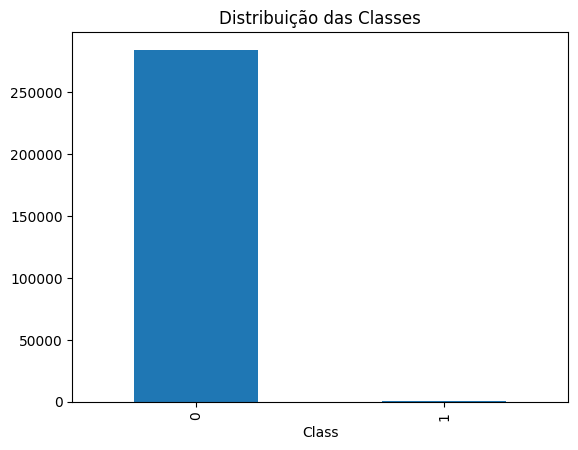

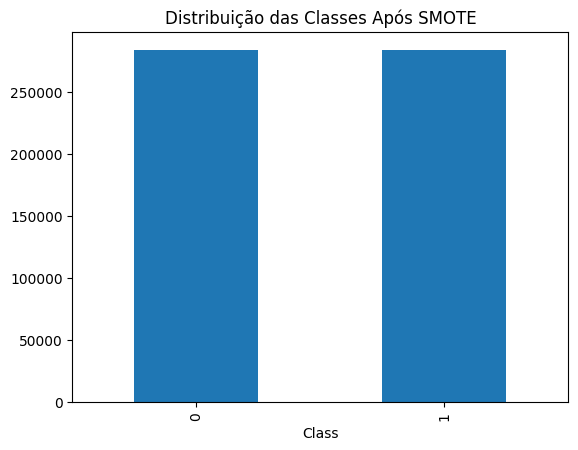

In [40]:
# Analisando o desequilíbrio das classes
y.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.show()

# Aplicando SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verificando a nova distribuição das classes
y_balanced.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes Após SMOTE')
plt.show()

## Arquitetura e estruturação do modelo de redes neurais

Divisão dos dados em treino, teste e validação.

In [41]:
# Primeiro, divisão dos dados em treino (70%) e teste (30%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Agora, dividimos o conjunto de treino em treino (70% do total) e validação (30% do total)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [12]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Resumo da arquitetura do modelov
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilação do modelo

In [13]:
optimizer = RMSprop(learning_rate=0.0001)

# Compilação do modelo sem TensorFlow Addons
model.compile(
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()])

## Treinamento do modelo

In [14]:
# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping]
                    )

# Avaliar o modelo no conjunto de teste
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

# Fazer previsões no conjunto de teste
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype("int32")

Epoch 1/5
4354/4354 [==============================] - 28s 6ms/step - loss: 0.6274 - accuracy: 0.6623 - precision: 0.6620 - recall: 0.6628 - val_loss: 0.6093 - val_accuracy: 0.6697 - val_precision: 0.6533 - val_recall: 0.7253
Epoch 2/5
4354/4354 [==============================] - 14s 3ms/step - loss: 0.5973 - accuracy: 0.6900 - precision: 0.6720 - recall: 0.7420 - val_loss: 0.5877 - val_accuracy: 0.7064 - val_precision: 0.6808 - val_recall: 0.7791
Epoch 3/5
4354/4354 [==============================] - 13s 3ms/step - loss: 0.5795 - accuracy: 0.7086 - precision: 0.6872 - recall: 0.7651 - val_loss: 0.5736 - val_accuracy: 0.7095 - val_precision: 0.6859 - val_recall: 0.7748
Epoch 4/5
4354/4354 [==============================] - 14s 3ms/step - loss: 0.5711 - accuracy: 0.7106 - precision: 0.6920 - recall: 0.7588 - val_loss: 0.5705 - val_accuracy: 0.7101 - val_precision: 0.6872 - val_recall: 0.7728
Epoch 5/5
5331/5331 [==============================] - 10s 2ms/step - loss: 0.5650 - accuracy: 0

## Avaliação da performance do modelo no conjunto de validação

In [15]:
# Avaliar o modelo no conjunto de teste
results = model.evaluate(X_test, y_test)
test_loss, test_accuracy, test_precision, test_recall = results
print(f'Conjunto de Teste - Loss: {test_loss}, Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}')

# Avaliar o modelo no conjunto de validação
results_val = model.evaluate(X_val, y_val)
val_loss, val_accuracy, val_precision, val_recall = results_val
print(f'Conjunto de Validação - Loss: {val_loss}, Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}')

5331/5331 [==============================] - 9s 2ms/step - loss: 0.5650 - accuracy: 0.7082 - precision: 0.6937 - recall: 0.7473
Conjunto de Teste - Loss: 0.564990758895874, Accuracy: 0.7081992626190186, Precision: 0.6937225461006165, Recall: 0.7473431825637817
3732/3732 [==============================] - 7s 2ms/step - loss: 0.5645 - accuracy: 0.7091 - precision: 0.6929 - recall: 0.7495
Conjunto de Validação - Loss: 0.564480185508728, Accuracy: 0.7090852856636047, Precision: 0.6929088830947876, Recall: 0.7494968175888062


## Visualização gráfica

Gráfico de linha com as épocas ao longo do tempo

In [16]:
epochs = list(range(1, len(history.history['loss']) + 1))
history_df = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})

fig_loss = px.line(history_df, x='Epoch', y=['Training Loss', 'Validation Loss'],
                   labels={'value': 'Loss', 'variable': 'Type'},
                   title='Loss during Training')
fig_loss.show()

fig_accuracy = px.line(history_df, x='Epoch', y=['Training Accuracy', 'Validation Accuracy'],
                       labels={'value': 'Accuracy', 'variable': 'Type'},
                       title='Accuracy during Training')
fig_accuracy.show()

Matriz de confusão

In [17]:
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Supondo que você já tenha treinado o modelo com o código anterior

# Fazer previsões no conjunto de teste
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um DataFrame a partir da matriz de confusão para facilitar a visualização com Plotly
cm_df = pd.DataFrame(cm, index=['Classe 0', 'Classe 1'], columns=['Predito 0', 'Predito 1'])

# Plotar a matriz de confusão usando Plotly Express
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale='Blues', aspect='auto')
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predição',
    yaxis_title='Verdadeiro',
    coloraxis_showscale=False
)
fig.show()

5331/5331 [==============================] - 7s 1ms/step


# Modelo com o ajuste de hiperparâmetros

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scikeras.wrappers import KerasRegressor

## Arquitetura e estruturação do modelo de redes neurais

In [47]:
# Instalar SciKeras e outras dependências
!pip install scikeras tensorflow sklearn pandas matplotlib plotly imblearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [48]:
def build_model(n_neurons=16, learning_rate=0.001, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(n_neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Criar o wrapper do modelo para o scikit-learn
model = KerasClassifier(model=build_model, verbose=0)

# Definir o espaço de busca dos hiperparâmetros
param_distribs = {
    'model__n_neurons': [16, 32, 64, 128],
    'model__learning_rate': [0.001, 0.0001, 0.00001],
    'model__dropout_rate': [0.0, 0.2, 0.5],
    'batch_size': [32, 64, 128],
    'epochs': [20, 50, 100]
}

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_distribs,
                                   n_iter=10,
                                   cv=3,
                                   scoring='f1',
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=1,
                                   error_score='raise')

# Executar a busca pelos melhores hiperparâmetros
random_search.fit(X_train, y_train)

In [ ]:
# Extrair o melhor modelo encontrado
best_model = random_search.best_estimator_

# Previsões no conjunto de validação
y_val_pred_prob = best_model.predict_proba(X_val)
y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

# Calcular métricas no conjunto de validação
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_roc = roc_auc_score(y_val, y_val_pred_prob)

print("Métricas no Conjunto de Validação:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Previsões no conjunto de teste
y_test_pred_prob = best_model.predict_proba(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype("int32")

# Calcular métricas no conjunto de teste
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, y_test_pred_prob)

print("\nMétricas no Conjunto de Teste:")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"AUC-ROC: {auc_roc_test:.4f}")